In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [14, 9]

In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = SGDClassifier(loss='log', penalty='l2', early_stopping=True,
                         max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
    'logistic__max_iter': [10000, 5000]
}
search = GridSearchCV(pipe, param_grid, cv=5)

In [4]:
search.fit(X_digits, y_digits)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=True,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                

## First plot

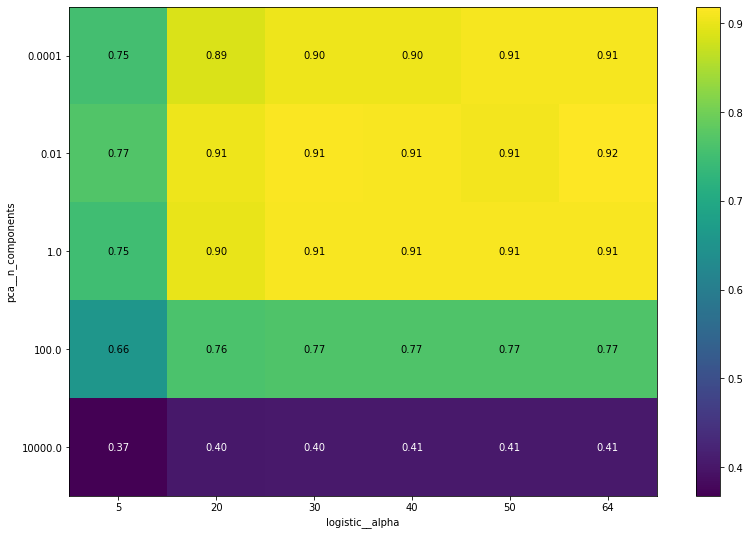

In [7]:
from tf_plot import plot_grid_search
viz = plot_grid_search(search, ['pca__n_components', 'logistic__alpha'], include_values=True)

## Adjust cmap (with plot)

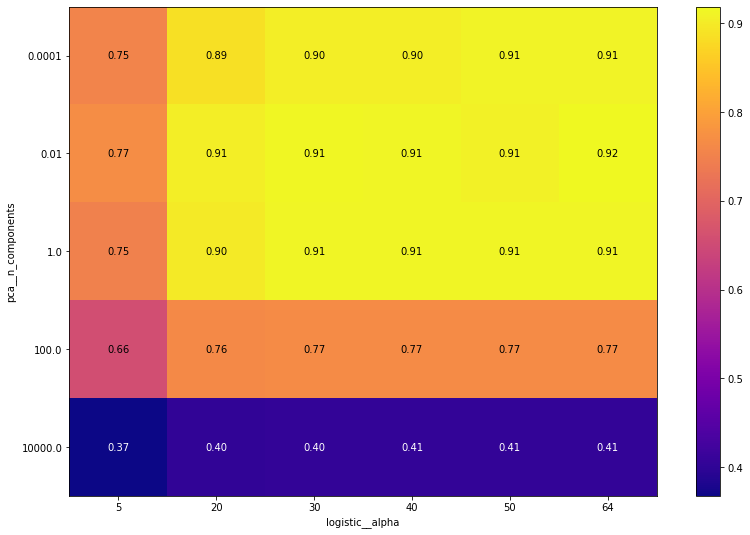

In [8]:
viz.plot(cmap='plasma', include_values=True)

## Adjust cmap directly 

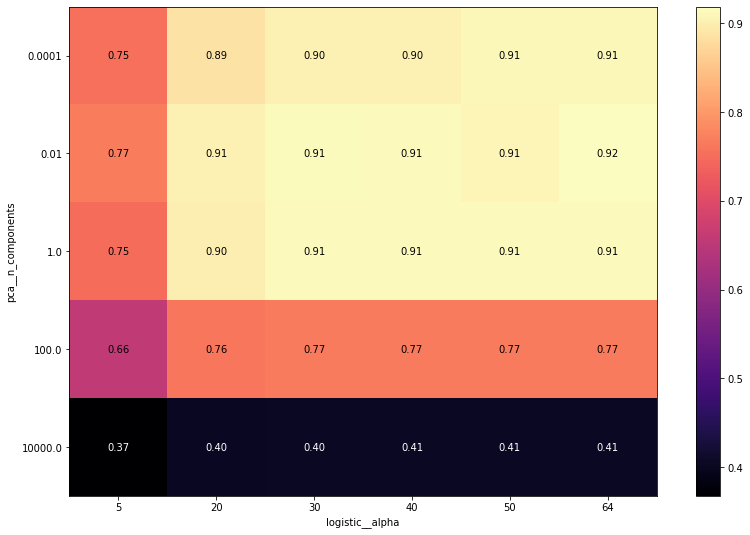

In [9]:
viz.im_.set_cmap('magma')
viz.figure_